In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [63]:
df= pd.read_csv('loan-train.csv')


In [64]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Preprocessing

In [65]:
#Missing Values checking
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
df.fillna(method='bfill',inplace=True)

In [67]:
#Missing Values checking
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Visualization

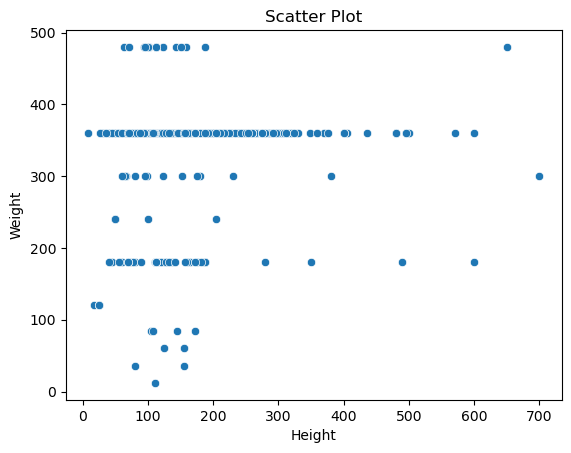

In [7]:
sns.scatterplot(x=df['LoanAmount'], y=df['Loan_Amount_Term'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot')
plt.show()

<Axes: xlabel='Gender'>

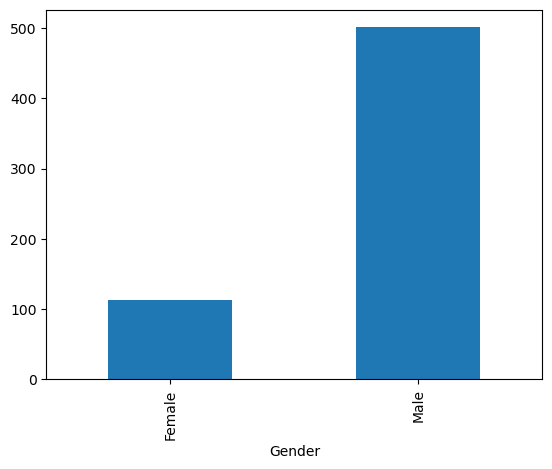

In [8]:
#plotting Gender 
Gender_count = df.groupby('Gender').count()

Gender_count['LoanAmount'].plot(kind = 'bar')

<Axes: xlabel='Loan_Status'>

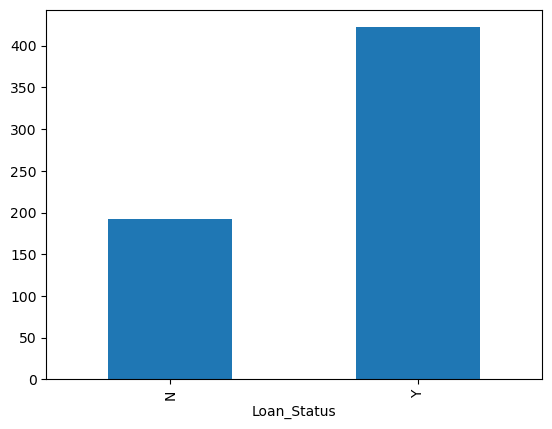

In [9]:
#plotting Loan Status 
Gender_count = df.groupby('Loan_Status').count()

Gender_count['LoanAmount'].plot(kind = 'bar')

C:\Users\Raja.Balasubramani\AppData\Local\Temp\ipykernel_3792\1826303334.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


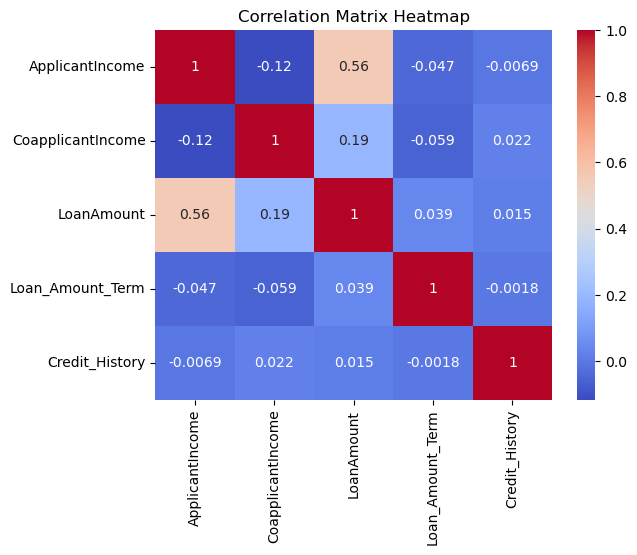

In [10]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
def Sampling(data_col):
    positive_samples = df[df[data_col] == 'Y']
    negative_samples = df[df[data_col] == 'N']

    positive_count = len(positive_samples)
    negative_count = len(negative_samples)

    # Oversample the minority class to balance the dataset
    oversampled_positive = positive_samples.sample(n=negative_count, replace=True, random_state=42)

    # Combine the oversampled positive class with the negative class
    balanced_data = pd.concat([negative_samples, oversampled_positive])

    # Shuffle the balanced dataset
    balanced_data = balanced_data.sample(frac=1, random_state=42)
    
    

    # Check the class distribution after balancing
    print(balanced_data[data_col].value_counts())
    
    return balanced_data
    
balanced_data = Sampling('Loan_Status')



Y    192
N    192
Name: Loan_Status, dtype: int64


In [12]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 446 to 328
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            384 non-null    object 
 1   Gender             384 non-null    object 
 2   Married            384 non-null    object 
 3   Dependents         384 non-null    object 
 4   Education          384 non-null    object 
 5   Self_Employed      384 non-null    object 
 6   ApplicantIncome    384 non-null    int64  
 7   CoapplicantIncome  384 non-null    float64
 8   LoanAmount         384 non-null    float64
 9   Loan_Amount_Term   384 non-null    float64
 10  Credit_History     384 non-null    float64
 11  Property_Area      384 non-null    object 
 12  Loan_Status        384 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 42.0+ KB


In [60]:
# Encode categorical variables
label_encoder = LabelEncoder()

balanced_data['Gender'] = label_encoder.fit_transform(balanced_data['Gender'])
balanced_data['Married'] = label_encoder.fit_transform(balanced_data['Married'])
balanced_data['Dependents'] = label_encoder.fit_transform(balanced_data['Dependents'])
balanced_data['Education'] = label_encoder.fit_transform(balanced_data['Education'])
balanced_data['Self_Employed'] = label_encoder.fit_transform(balanced_data['Self_Employed'])
balanced_data['Property_Area'] = label_encoder.fit_transform(balanced_data['Property_Area'])

In [74]:
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
print(label_encoder.classes_)

df['Married'] = label_encoder.fit_transform(df['Married'])
print(label_encoder.classes_)

df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
print(label_encoder.classes_)


df['Education'] = label_encoder.fit_transform(df['Education'])
print(label_encoder.classes_)


df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
print(label_encoder.classes_)


df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
print(label_encoder.classes_)


[0 1]
[0 1]
[0 1 2 3]
[0 1]
[0 1]
[0 1 2]


In [75]:
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    print(f"{column}: {df[column].unique()} -> {label_encoder.classes_}")


Gender: [1 0] -> [0 1 2]
Married: [0 1] -> [0 1 2]
Dependents: [0 1 2 3] -> [0 1 2]
Education: [0 1] -> [0 1 2]
Self_Employed: [0 1] -> [0 1 2]
Property_Area: [2 0 1] -> [0 1 2]


In [37]:
import pickle
with open('label.pickle','wb') as f:
    pickle.dump(label_encoder,f)

In [57]:
Gender='Male'
label_encoder.transform([Gender])

ValueError: y contains previously unseen labels: 'Male'

In [70]:
# Split the data into training and testing sets
X = balanced_data.drop(['Loan_ID','Loan_Status'],axis=1)
y = balanced_data['Loan_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Using the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=40, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7083333333333334


In [74]:
import pickle
with open('model.pickle','wb') as f:
    pickle.dump(rf_classifier,f)

In [71]:
#Model Using Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.65625


In [72]:
#Model Using Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.65625


In [73]:
#Model Using SVM

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.46875
